#  <span style="text-decoration:underline;">Assignment 1</span>: Analyzing Stack Overflow Data

## Introduction 

In this assignment, we will look at [Stack Overflow](https://stackoverflow.com/) post data from the year of 2015 and measure the similarity of users by looking at the types of questions they answer. Do not delete the output of your code cells. This assignment must be completed **individually** by each student.

## Submission 

Please use the following invitation link to create your assignment repository for this assignment: [https://classroom.github.com/a/epLjOcUA](https://classroom.github.com/a/epLjOcUA). Include your BU username within your submission by adding it here: He Xin   BUID:U81612345.

## Data Retrieval

Below we make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [1]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")

print(response) # Displays the HTTP response code (should be 200 for success).

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [ ]:
print(response.text)

The raw response is not very useful for automated processing. Instead, we can decode the raw response as JSON and then use the `json` library to print it.

In [ ]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=2))

It is now possible to see that the response consists of a list of question items. For each of these items, we get information about its attributes: `creation_date`, `answer_count`, `owner`, `title`, and so on.

Notice that `has_more` is `true`. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

## <span style="text-decoration:underline;">Problem 1</span>: Parsing the responses

In this problem you will practice using some of the techniques and string handling methods that Python offers. Our goal is to extract the interesting parts of the response data and transform them into a format that will be useful for our final analysis.

**<span style="text-decoration:underline;">Part A</span> (8 points):** We will first isolate the `creation_date` attribute in the response. Complete the definition of the ```print_creation_dates_json()``` below, which reads the response and prints the creation dates.

In [2]:
import json
import pandas as pd
def print_creation_dates_json(response):
    json_response = response.json()
    df = pd.DataFrame(json_response['items'])
    print(pd.to_datetime(df.loc[:, 'creation_date'],unit='s'))
    return
print_creation_dates_json(response)

0    2015-01-01 00:00:58
1    2015-01-01 00:01:43
2    2015-01-01 00:02:32
3    2015-01-01 00:02:57
4    2015-01-01 00:03:31
5    2015-01-01 00:04:01
6    2015-01-01 00:05:03
7    2015-01-01 00:05:27
8    2015-01-01 00:05:34
9    2015-01-01 00:06:17
10   2015-01-01 00:06:41
11   2015-01-01 00:07:28
12   2015-01-01 00:07:39
13   2015-01-01 00:07:46
14   2015-01-01 00:09:28
15   2015-01-01 00:10:05
16   2015-01-01 00:10:29
17   2015-01-01 00:11:43
18   2015-01-01 00:12:02
19   2015-01-01 00:12:55
20   2015-01-01 00:13:04
21   2015-01-01 00:13:32
22   2015-01-01 00:13:50
23   2015-01-01 00:15:40
24   2015-01-01 00:17:11
25   2015-01-01 00:18:50
26   2015-01-01 00:22:16
27   2015-01-01 00:23:14
28   2015-01-01 00:23:50
29   2015-01-01 00:24:28
             ...        
70   2015-01-01 01:00:37
71   2015-01-01 01:00:57
72   2015-01-01 01:01:25
73   2015-01-01 01:02:50
74   2015-01-01 01:03:24
75   2015-01-01 01:03:44
76   2015-01-01 01:03:46
77   2015-01-01 01:04:29
78   2015-01-01 01:05:20


**<span style="text-decoration:underline;">Part B</span> (8 points):** Write code that issues requests to retrieve all of the creation dates of questions posted on the first day in 2015. The code should call the ```print_creation_dates_json()``` function to print out each page of results.

**Hint:** You can use a loop and take advantage of the `has_more` attribute to request additional pages of results if they exist. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle); you can use the Python `sleep` function in the `time` module ([documentation can be found here](https://docs.python.org/3/library/time.html#time.sleep)) to add a delay between requests.

In [3]:
from pandas.io.json import json_normalize
import time as t
def print_all_dateinfo(response):
    i = 1
    while True:
        response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100&page="+ str(i) +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
        json_response = response.json()
        df = json_normalize(json_response)
        print_creation_dates_json(response)
        s = df.loc[:, 'has_more']
        if(s[0] == False):
            break
        i+=1
        t.sleep(1)
    return
print_all_dateinfo(response)

0    2015-01-01 00:00:58
1    2015-01-01 00:01:43
2    2015-01-01 00:02:32
3    2015-01-01 00:02:57
4    2015-01-01 00:03:31
5    2015-01-01 00:04:01
6    2015-01-01 00:05:03
7    2015-01-01 00:05:27
8    2015-01-01 00:05:34
9    2015-01-01 00:06:17
10   2015-01-01 00:06:41
11   2015-01-01 00:07:28
12   2015-01-01 00:07:39
13   2015-01-01 00:07:46
14   2015-01-01 00:09:28
15   2015-01-01 00:10:05
16   2015-01-01 00:10:29
17   2015-01-01 00:11:43
18   2015-01-01 00:12:02
19   2015-01-01 00:12:55
20   2015-01-01 00:13:04
21   2015-01-01 00:13:32
22   2015-01-01 00:13:50
23   2015-01-01 00:15:40
24   2015-01-01 00:17:11
25   2015-01-01 00:18:50
26   2015-01-01 00:22:16
27   2015-01-01 00:23:14
28   2015-01-01 00:23:50
29   2015-01-01 00:24:28
             ...        
70   2015-01-01 01:00:37
71   2015-01-01 01:00:57
72   2015-01-01 01:01:25
73   2015-01-01 01:02:50
74   2015-01-01 01:03:24
75   2015-01-01 01:03:44
76   2015-01-01 01:03:46
77   2015-01-01 01:04:29
78   2015-01-01 01:05:20


0    2015-01-01 08:33:55
1    2015-01-01 08:35:13
2    2015-01-01 08:36:50
3    2015-01-01 08:37:03
4    2015-01-01 08:37:49
5    2015-01-01 08:38:21
6    2015-01-01 08:38:50
7    2015-01-01 08:39:25
8    2015-01-01 08:39:31
9    2015-01-01 08:39:43
10   2015-01-01 08:39:49
11   2015-01-01 08:40:19
12   2015-01-01 08:40:47
13   2015-01-01 08:41:06
14   2015-01-01 08:41:36
15   2015-01-01 08:41:55
16   2015-01-01 08:42:04
17   2015-01-01 08:42:06
18   2015-01-01 08:42:17
19   2015-01-01 08:43:20
20   2015-01-01 08:43:50
21   2015-01-01 08:45:00
22   2015-01-01 08:45:05
23   2015-01-01 08:45:36
24   2015-01-01 08:45:48
25   2015-01-01 08:47:07
26   2015-01-01 08:47:50
27   2015-01-01 08:48:26
28   2015-01-01 08:50:01
29   2015-01-01 08:50:57
             ...        
70   2015-01-01 09:29:45
71   2015-01-01 09:31:02
72   2015-01-01 09:31:11
73   2015-01-01 09:32:05
74   2015-01-01 09:32:32
75   2015-01-01 09:32:38
76   2015-01-01 09:37:05
77   2015-01-01 09:38:48
78   2015-01-01 09:38:55


0    2015-01-01 13:42:12
1    2015-01-01 13:42:47
2    2015-01-01 13:44:43
3    2015-01-01 13:45:12
4    2015-01-01 13:45:46
5    2015-01-01 13:45:48
6    2015-01-01 13:46:11
7    2015-01-01 13:47:35
8    2015-01-01 13:47:35
9    2015-01-01 13:47:44
10   2015-01-01 13:47:56
11   2015-01-01 13:47:57
12   2015-01-01 13:48:05
13   2015-01-01 13:48:35
14   2015-01-01 13:48:46
15   2015-01-01 13:48:57
16   2015-01-01 13:49:09
17   2015-01-01 13:50:28
18   2015-01-01 13:50:42
19   2015-01-01 13:50:54
20   2015-01-01 13:50:57
21   2015-01-01 13:51:07
22   2015-01-01 13:51:13
23   2015-01-01 13:52:13
24   2015-01-01 13:52:15
25   2015-01-01 13:52:29
26   2015-01-01 13:53:21
27   2015-01-01 13:53:27
28   2015-01-01 13:53:46
29   2015-01-01 13:53:55
             ...        
70   2015-01-01 14:10:43
71   2015-01-01 14:11:39
72   2015-01-01 14:11:48
73   2015-01-01 14:12:00
74   2015-01-01 14:12:27
75   2015-01-01 14:13:58
76   2015-01-01 14:14:02
77   2015-01-01 14:14:39
78   2015-01-01 14:14:41


0    2015-01-01 18:02:11
1    2015-01-01 18:02:18
2    2015-01-01 18:03:05
3    2015-01-01 18:03:55
4    2015-01-01 18:04:23
5    2015-01-01 18:04:45
6    2015-01-01 18:04:50
7    2015-01-01 18:05:41
8    2015-01-01 18:05:53
9    2015-01-01 18:06:01
10   2015-01-01 18:06:52
11   2015-01-01 18:06:56
12   2015-01-01 18:07:27
13   2015-01-01 18:07:54
14   2015-01-01 18:08:09
15   2015-01-01 18:08:12
16   2015-01-01 18:08:21
17   2015-01-01 18:08:22
18   2015-01-01 18:08:28
19   2015-01-01 18:09:24
20   2015-01-01 18:11:13
21   2015-01-01 18:12:05
22   2015-01-01 18:12:07
23   2015-01-01 18:12:44
24   2015-01-01 18:13:48
25   2015-01-01 18:14:49
26   2015-01-01 18:14:55
27   2015-01-01 18:15:16
28   2015-01-01 18:15:29
29   2015-01-01 18:15:42
             ...        
70   2015-01-01 18:32:58
71   2015-01-01 18:33:18
72   2015-01-01 18:34:29
73   2015-01-01 18:35:43
74   2015-01-01 18:36:13
75   2015-01-01 18:37:05
76   2015-01-01 18:37:16
77   2015-01-01 18:37:27
78   2015-01-01 18:38:28


0    2015-01-01 22:09:14
1    2015-01-01 22:09:32
2    2015-01-01 22:09:47
3    2015-01-01 22:10:23
4    2015-01-01 22:10:46
5    2015-01-01 22:12:17
6    2015-01-01 22:12:34
7    2015-01-01 22:12:49
8    2015-01-01 22:13:30
9    2015-01-01 22:14:13
10   2015-01-01 22:14:32
11   2015-01-01 22:14:57
12   2015-01-01 22:15:22
13   2015-01-01 22:15:24
14   2015-01-01 22:16:01
15   2015-01-01 22:16:39
16   2015-01-01 22:16:43
17   2015-01-01 22:17:09
18   2015-01-01 22:17:58
19   2015-01-01 22:18:25
20   2015-01-01 22:18:32
21   2015-01-01 22:18:38
22   2015-01-01 22:18:42
23   2015-01-01 22:20:04
24   2015-01-01 22:20:05
25   2015-01-01 22:20:33
26   2015-01-01 22:20:55
27   2015-01-01 22:21:36
28   2015-01-01 22:23:28
29   2015-01-01 22:24:22
             ...        
70   2015-01-01 22:42:37
71   2015-01-01 22:43:41
72   2015-01-01 22:43:49
73   2015-01-01 22:44:05
74   2015-01-01 22:44:15
75   2015-01-01 22:44:44
76   2015-01-01 22:45:25
77   2015-01-01 22:45:38
78   2015-01-01 22:46:35


Due to time constraints, we have already downloaded the [data dump](http://cs-people.bu.edu/lapets/506/data/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that the XML file is 10GB in size unzipped. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab, or you can download it onto a USB drive. You may want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on the whole dataset, you will get a `MemoryError`.

Do not commit the data file to your repository. You may assume that we will place the data file in the same directory as your submitted notebook file, so use a relative path when loading the data file.

**<span style="text-decoration:underline;">Part C</span> (16 points):** Write a function that parses out the questions posted in 2015. These are posts with `PostTypeId=1`. The function should return a pandas `DataFrame`  object with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Call the function on an appropriate input and print out the `DataFrame` object; do not clear the output.

**Hint:** You should be able to use `iterparse` ([documentation can be found here](https://docs.python.org/3.8/library/xml.etree.elementtree.html#xml.etree.ElementTree.iterparse)):
```
from lxml.etree import iterparse
```
Once you create the `iterparse` object (let's call it `parsed`) for the file, you can use a `for` loop such as:
```
for _, element in parsed:
    # ...
```
You can use the `.tag` and `.get()` methods of the `element` object to inspect it and extract data from it.

In [4]:
import csv
import re
import math
from lxml.etree import iterparse
def parse_out(source, check_id, tags):
    row_list = []
    tree = iterparse(source)
    for event, element in tree:
        if(element.get('PostTypeId') is not None
           and int(element.get('PostTypeId'))== check_id):
            list = []
            for i in tags:
                cell = element.get(i)
                if i == 'Tags':
                    cell = re.findall(r'<(.*?)>',cell)[0]
                list.append(cell)
            row_list.append(list)
    df = pd.DataFrame(row_list,columns = tags).dropna(axis = 0)
    return df
questions = parse_out('stackoverflow-posts-2015.xml',1,
                      ['Id','CreationDate','OwnerUserId','Tags'])
print(questions)

               Id             CreationDate OwnerUserId            Tags
0        27727385  2015-01-01T00:00:58.253     3210431             php
1        27727388  2015-01-01T00:01:43.673      868779      apache-pig
2        27727391  2015-01-01T00:02:32.123     4372672             ios
3        27727393  2015-01-01T00:02:57.983     2482149      sql-server
4        27727394  2015-01-01T00:03:31.337     4263870             php
5        27727396  2015-01-01T00:04:01.407     4409381         android
6        27727406  2015-01-01T00:05:03.773      875317              c#
7        27727407  2015-01-01T00:05:27.167      821742            java
8        27727408  2015-01-01T00:05:34.733     2595033              c#
9        27727409  2015-01-01T00:06:17.720     1815395          apache
10       27727410  2015-01-01T00:06:41.067      541091           mysql
11       27727414  2015-01-01T00:07:28.747     1210038      javascript
12       27727418  2015-01-01T00:07:39.243     3674356             php
13    

## <span style="text-decoration:underline;">Problem 2</span>: Analyzing the responses

**<span style="text-decoration:underline;">Part A</span> (50 points):** Write a function that measures the similarity of the top 100 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class.

Note that answers are posts with `PostTypeId=2`. The identifier of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

**Hint:** You may want to begin your solution by constructing a data set in the following way:
1. Find users with the most responses using `.groupby()` on a data frame containing all of the entries in the answers data set.
2. Sort to find the top 100 users from the result above.
3. Find all the question identifiers (using `ParentId`) among the answers of the top 100 users (within the answers data set).
4. Join/merge the result above with the questions data set to get the tags of the questions answered by the top 100 users.

In [5]:
answers = parse_out('stackoverflow-posts-2015.xml',2,['Id','OwnerUserId','ParentId'])

In [6]:
import numpy as np
np.set_printoptions(threshold=1000)
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
#     using Euclidean distance
def distance_function(data):
    result = {}
    for i in range(0,data.shape[0]):
        l = []
        for j in range(0,data.shape[0]):
            l.append(sum((data.iloc[i] - data.iloc[j])**2)**0.5)
        result[data.index[i]] = l
    return result
def get_top_users(data,num):
    users = data.groupby(['OwnerUserId']).size().to_frame('counts')
    return users.sort_values('counts',ascending = False).head(num)
def get_user_tag_dict(top_users,df_questions,df_answers):
    top_users_parentid = df_answers.merge(top_users, left_on='OwnerUserId', 
                                          right_on='OwnerUserId')
    tag_set = top_users_parentid.merge(df_questions,left_on='ParentId',right_on='Id')
    top_users_tags = tag_set.drop(['ParentId','Id_x','counts','Id_y',
                                   'CreationDate','OwnerUserId_y'], axis = 1)
    top_users_tags['OwnerUserId_x'] = top_users_tags['OwnerUserId_x'].astype('int64')
    return top_users_tags.to_dict('records')
def similarity_measure(df_questions, df_answers):
    top_users = get_top_users(df_answers,100)
    tag_dict = get_user_tag_dict(top_users,df_questions,df_answers)
    feature_arr = vec.fit_transform(tag_dict)
    feature_frame = pd.DataFrame(data = feature_arr[0:,0:],columns = vec.get_feature_names())
    feature_frame = feature_frame.groupby('OwnerUserId_x').sum()
#     normalize the data
    feature_frame[feature_frame != 0] = 1
    return distance_function(feature_frame)
similarity_dict = similarity_measure(questions, answers)
df_pic = pd.DataFrame.from_dict(similarity_dict, 
                                orient = 'index').reset_index().drop('index',axis = 1)
print(df_pic)

           0          1          2          3          4          5   \
0    0.000000  12.922848   7.681146  11.269428   7.549834   8.000000   
1   12.922848   0.000000  13.490738  14.491377  13.038405  13.601471   
2    7.681146  13.490738   0.000000  12.000000   9.273618   9.643651   
3   11.269428  14.491377  12.000000   0.000000  11.224972  12.206556   
4    7.549834  13.038405   9.273618  11.224972   0.000000   9.110434   
5    8.000000  13.601471   9.643651  12.206556   9.110434   0.000000   
6    7.745967  13.228757   9.433981  12.369317   9.000000   9.486833   
7    8.062258  13.266499   9.695360  11.747340   9.055385   8.774964   
8    6.403124  13.266499   8.246211  11.661904   7.348469   7.681146   
9    9.695360  14.247807  10.816654  12.845233  10.723805  10.392305   
10   7.745967  13.152946   9.110434  11.532563   9.000000   8.831761   
11   6.855655  12.806248   8.944272  11.224972   8.000000   8.774964   
12   6.324555  13.152946   8.062258  11.704700   8.426150   8.71

**<span style="text-decoration:underline;">Part B</span> (18 points):** Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html).

This is a dissimilarity heatmap using Euclidean distance to display the dissimilarity.
I have normalized the data that means If a users answered a specific question with a tag,
no matter how many times, I make the tag slot of this user to 1.


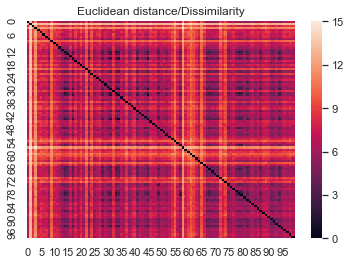

In [14]:
import seaborn
import matplotlib.pyplot as plt
seaborn.set()
title = plt.axes()
seaborn.heatmap(df_pic)
title.set_title('Euclidean distance/Dissimilarity')
print("""This is a dissimilarity heatmap using Euclidean distance to display the dissimilarity.
I have normalized the data that means If a users answered a specific question with a tag,
no matter how many times, I make the tag slot of this user to 1.""")